<a href="https://colab.research.google.com/github/armandovl/funciones_descriptiva/blob/main/Clase_Estadistica_Descriptiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.- Importar los datos

In [42]:
#importamos librerías de cajon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#importamos el data frame
url="https://raw.githubusercontent.com/armandovl/datasets_uno/main/atitanic.csv"
datos= pd.read_csv(url) #leer la url y ponerlo en un dataframe
datos.head() #ver el encabezado

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere


## 1.-Manejo del Data Frame

In [44]:
datos.head(8) #primeras 8 filas

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
5,885,"Sutehall, Mr. Henry Jr",25.0,3,male,0,S,muere
6,884,"Banfield, Mr. Frederick James",28.0,2,male,0,S,muere
7,883,"Dahlberg, Miss. Gerda Ulrika",22.0,3,female,0,S,muere


In [45]:
datos.tail(5) #últimas 8 filas

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
709,5,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,3,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive
713,1,"Braund, Mr. Owen Harris",22.0,3,male,1,S,muere


In [46]:
datos.shape #imprime las filas y las columnas

(714, 8)

In [47]:
datos.columns #nombre de las columnas

Index(['PassengerId', 'Name', 'Age', 'Pclass', 'Sex', 'Family', 'Embarked',
       'Survived'],
      dtype='object')

In [48]:
datos.dtypes #tipos de variables

PassengerId      int64
Name            object
Age            float64
Pclass           int64
Sex             object
Family           int64
Embarked        object
Survived        object
dtype: object

In [49]:
datos.info() # nombre columna conteo nulos tipos de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Name         714 non-null    object 
 2   Age          714 non-null    float64
 3   Pclass       714 non-null    int64  
 4   Sex          714 non-null    object 
 5   Family       714 non-null    int64  
 6   Embarked     714 non-null    object 
 7   Survived     714 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 44.8+ KB


In [50]:
#cambiar nombre de ciertas columnas
datos=datos.rename(columns={'PassengerId':'Identificador',
                      'Name':'El nombre',
                      'Age':'la edad'}
             )
datos

,Identificador,El nombre,la edad,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...,...
709,5,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,3,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [51]:
#cambiar nombre de todas columnas
datos.columns = ['Id', 'Nombre', 'Edad', 'Clase', 'Sexo', 'Familia','Embarcacion','Sobrevivientes']
datos

,Id,Nombre,Edad,Clase,Sexo,Familia,Embarcacion,Sobrevivientes
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...,...
709,5,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,3,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [52]:
#eliminar columna
datos=datos.drop(['Id'],axis=1)
datos

,Nombre,Edad,Clase,Sexo,Familia,Embarcacion,Sobrevivientes
0,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere
...,...,...,...,...,...,...,...
709,"Allen, Mr. William Henry",35.0,3,male,0,S,muere
710,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,female,1,S,vive
711,"Heikkinen, Miss. Laina",26.0,3,female,0,S,vive
712,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,female,1,C,vive


In [53]:
#eliminar varias columnas
datos=datos.drop(['Nombre',"Familia",'Embarcacion'],axis=1)
datos

,Edad,Clase,Sexo,Sobrevivientes
0,32.0,3,male,muere
1,26.0,1,male,vive
2,19.0,1,female,vive
3,27.0,2,male,muere
4,39.0,3,female,muere
...,...,...,...,...
709,35.0,3,male,muere
710,35.0,1,female,vive
711,26.0,3,female,vive
712,38.0,1,female,vive


In [54]:
datos.describe() #descriptivos

,Edad,Clase
count,714.000000,714.000000
mean,29.699118,2.236695
std,14.526497,0.838250
min,0.420000,1.000000
25%,20.125000,1.000000
50%,28.000000,2.000000
75%,38.000000,3.000000
max,80.000000,3.000000


In [55]:
datos.describe().round(1) #descriptivos un decimal

,Edad,Clase
count,714.0,714.0
mean,29.7,2.2
std,14.5,0.8
min,0.4,1.0
25%,20.1,1.0
50%,28.0,2.0
75%,38.0,3.0
max,80.0,3.0


In [56]:
datos.describe().round(1).transpose() #descriptivos un decimal y transpuesto

,count,mean,std,min,25%,50%,75%,max
Edad,714.0,29.7,14.5,0.4,20.1,28.0,38.0,80.0
Clase,714.0,2.2,0.8,1.0,1.0,2.0,3.0,3.0


In [57]:
datos.Clase=pd.Categorical(datos["Clase"]) #Transformamos en cateorica

In [58]:
datos.info() #vemos que la variable ya es categorica 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Edad            714 non-null    float64 
 1   Clase           714 non-null    category
 2   Sexo            714 non-null    object  
 3   Sobrevivientes  714 non-null    object  
dtypes: category(1), float64(1), object(2)
memory usage: 17.7+ KB


In [59]:
datos.describe().round(1).transpose() #como Clase ya es categórica ya no aparecen sus descriptivos

,count,mean,std,min,25%,50%,75%,max
Edad,714.0,29.7,14.5,0.4,20.1,28.0,38.0,80.0


## Estadísticos descriptivos de una variable

In [60]:
#bibliografía https://www.odiolaestadistica.com/estadistica-python/asimetria/
#bibliografía https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

# Medidas de tendencia central
total=len(datos["Edad"]) #largo de la variable
media = datos["Edad"].mean() #media
mediana = datos["Edad"].median() #mediana
moda = datos["Edad"].mode()[0] #moda no se olvide poner el [0]
#Medidas de dispersión
varianza= datos["Edad"].var(ddof=1) #varianza ddof=0 poblacional ddof=1 muestral
desv_st=datos["Edad"].std(ddof=1) #desviación estandar ddof=0 poblacional ddof=1 muestral
coef_var=(datos["Edad"].std(ddof=1)/ datos["Edad"].mean())*100 #agregar el *100

#creamos un Data Frame llamado descriptivos_a
descriptivos_a=pd.DataFrame()
descriptivos_a["medida"]=["total_datos","media","mediana","moda","varianza","desviacion_estandar","coficiente_variación"]
descriptivos_a["valores"]=[total,media,mediana,moda,varianza,desv_st,coef_var]

descriptivos_a.round(1)

,medida,valores
0,total_datos,714.0
1,media,29.7
2,mediana,28.0
3,moda,24.0
4,varianza,211.0
5,desviacion_estandar,14.5
6,coficiente_variación,48.9


In [63]:
#medidas de posición
p90 = datos["Edad"].quantile(0.9) #percentil 90
rango_inter_cuartil=datos["Edad"].quantile(0.75)-datos["Edad"].quantile(0.25)

print("percentil x =",p90)
print("Rango intercuartil=",rango_inter_cuartil)


percentil x = 50.0
Rango intercuartil= 17.875


In [64]:
#otras medidas estadísticas
import scipy.stats as st

In [65]:
st.sem(datos["Edad"], ddof = 1) #error estandar de la media

0.5436404994496713

In [68]:
#intervalo de confianza
st.t.interval(alpha=0.90,
              df=len(datos["Edad"])-1,
              loc=np.mean(datos["Edad"]), 
              scale=st.sem(datos["Edad"]))

(28.803745252609882, 30.594490041507772)

In [67]:
#sacar la asimetría y la curtosis
print('Kursotis:', st.kurtosis(datos["Edad"])) 
print('Skewness:', st.skew(datos["Edad"]))

Kursotis: 0.16863657224286044
Skewness: 0.38828985146986567


In [69]:
#probar si hay distribución normal para +50 registros
#biblio https://www.cienciadedatos.net/documentos/pystats06-analisis-normalidad-python.html

# Shapiro-Wilk test
# ==============================================================================

estadistico, p_value = st.shapiro(datos["Edad"])
print(f"Estadístico = {estadistico}, p-value = {p_value}")

# ====si p valor menor a 0.05 entonces la dstribución es no normal=============

Estadístico = 0.9814548492431641, p-value = 7.322165629375377e-08


In [70]:
# D'Agostino's K-squared test para +50 registros nunca utilizar en -20
# ==============================================================================
k2, p_value = st.normaltest(datos["Edad"])
print(f"Estadístico = {k2}, p-value = {p_value}")

# ====si p valor menor a 0.05 entonces la dstribución es no normal=============

Estadístico = 18.10503295208975, p-value = 0.00011709599657350791


In [71]:
#Kolmogorov – Smirnoff para muestras pequeñas

# ==============================================================================
st.kstest(datos["Edad"], 'norm')
# ====si p valor menor a 0.05 entonces la dstribución es no normal=============

KstestResult(statistic=0.9650366565902186, pvalue=0.0)

## 3.- Métodos gráficos de exploración de una variables cuantitativa

### 3.1 Histogramas

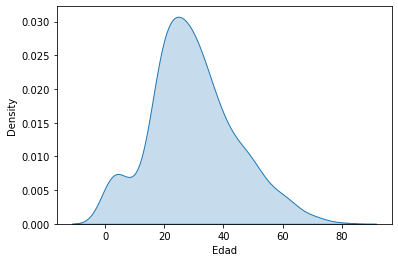

In [76]:
#mirar la distribución mediante kdeplot
sns.kdeplot(data=datos["Edad"], shade=True)
plt.show()

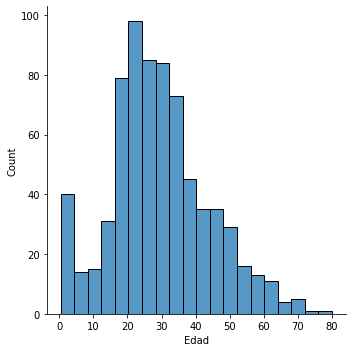

In [84]:
#mirar la distribución mediante displot
sns.displot(datos["Edad"])
plt.show()

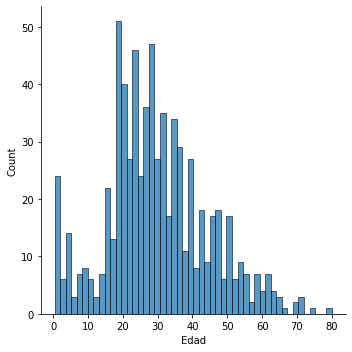

In [81]:
sns.displot(datos["Edad"],bins=50) #aumentar el numero de columnas 
plt.show()

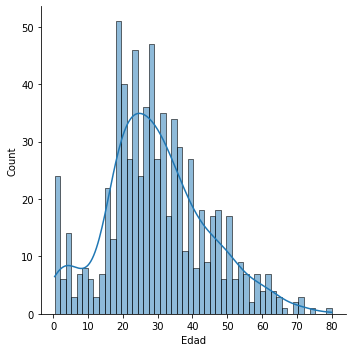

In [86]:
sns.displot(datos["Edad"],bins=50, kde=True) #agregar linea de tendencia
plt.show()

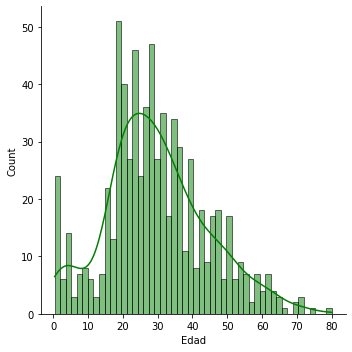

In [88]:
sns.displot(datos["Edad"],bins=50, kde=True, color="green") #cambiar color
plt.show()

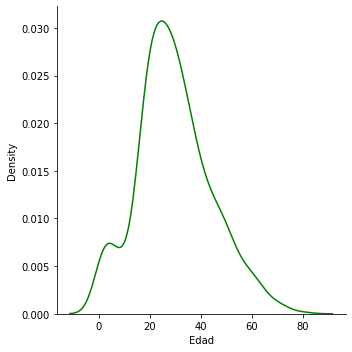

In [91]:
sns.displot(datos["Edad"], color="green",kind="kde") #dejar simplemente  la linea 
plt.show()

### 3.2 Gráfico de Cajas y bigotes

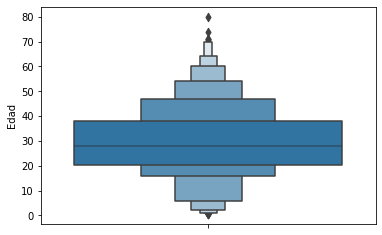

In [94]:
#hacer un boxplot vertical
sns.boxenplot(y=datos["Edad"], data=datos)
plt.show()

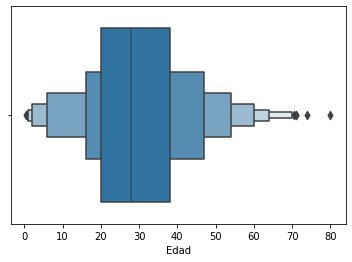

In [97]:
#hacer un boxplot horizontal
sns.boxenplot(x=datos["Edad"], data=datos)
plt.show()

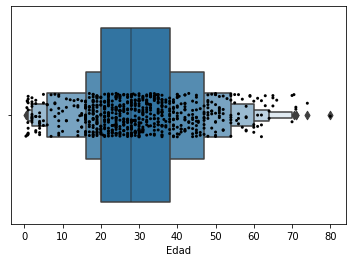

In [102]:
sns.boxenplot(x=datos["Edad"], data=datos)
sns.stripplot(x=datos["Edad"],size=3,color="black") #colocar puntos stripplot
plt.show()

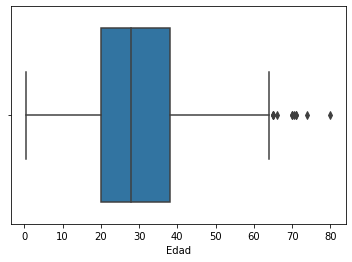

In [103]:
#hacer otro tipo de gráfico de cajas y bigotes
sns.boxplot(x=datos["Edad"])
plt.show()

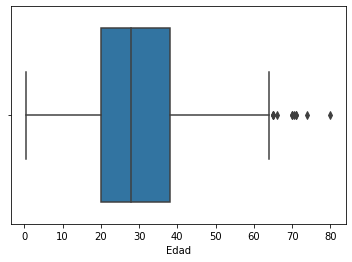

In [105]:
#otra manera de escribirlo
sns.boxplot(x="Edad", data=datos)
plt.show()

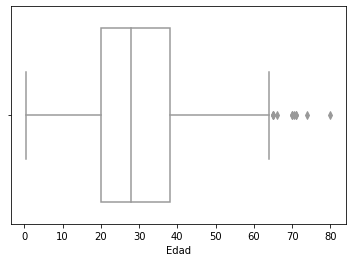

In [106]:
sns.boxplot(x="Edad", data=datos, color="white") #ponerle color
plt.show()

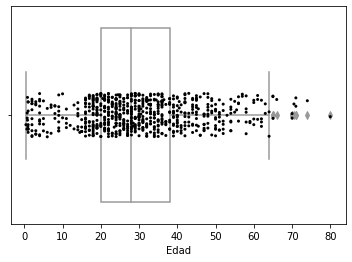

In [110]:
sns.boxplot(x="Edad", data=datos, color="white") 
sns.stripplot(x="Edad", data=datos, size=3, color="black") #agregamos los puntos de datos
plt.show()

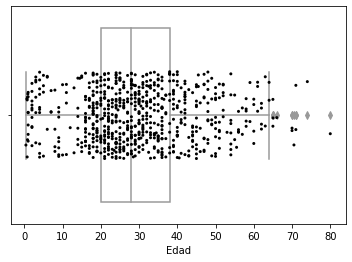

In [114]:
sns.boxplot(x="Edad", data=datos, color="white") #ponerle color
sns.stripplot(x="Edad", data=datos, size=3, color="black",
              jitter=0.2, ) #aumentamos la esparción de los puntos
plt.show()

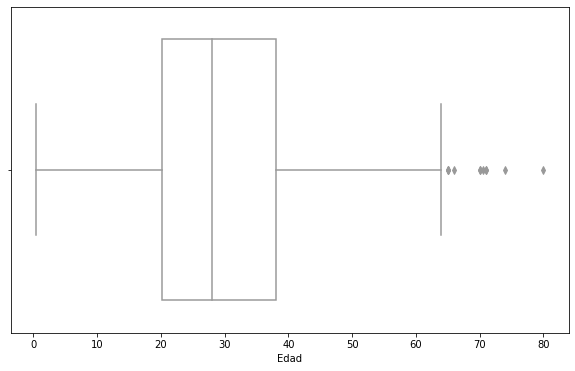

In [119]:
plt.figure(figsize=(10,6)) #instanciamos la figura y agregamos tamaño x, y
ax=sns.boxplot(x="Edad", data=datos, color="white")
plt.show(ax)

In [120]:
media

29.699117647058827

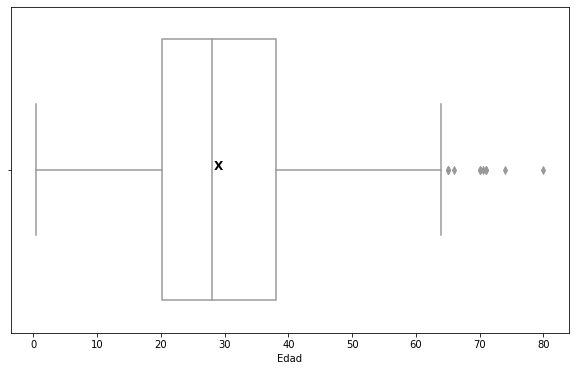

In [121]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax.text(29,0, "X", 
        weight="bold",size=12,ha='center')#agregamos la media manualmente
plt.show(ax)

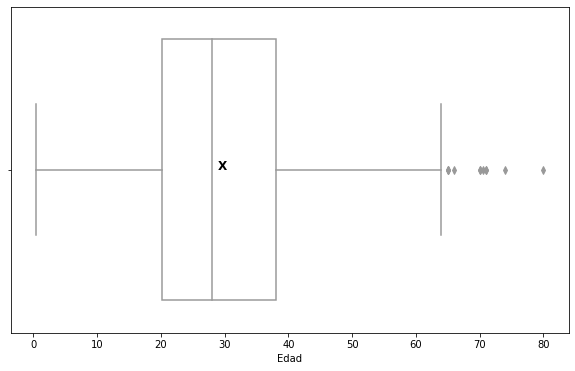

In [122]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax.text(datos.Edad.mean(),0, "X", 
        weight="bold",size=12,ha='center')#agregamos la media automatica
plt.show(ax)

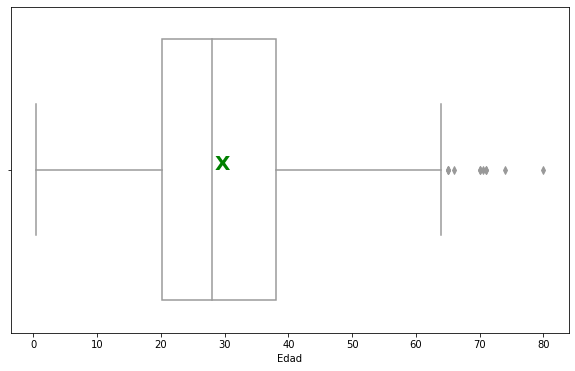

In [126]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax.text(datos.Edad.mean(),0, "X", 
        weight="bold",size=20,ha='center', color="g")#agregamos la media automatica
plt.show(ax)

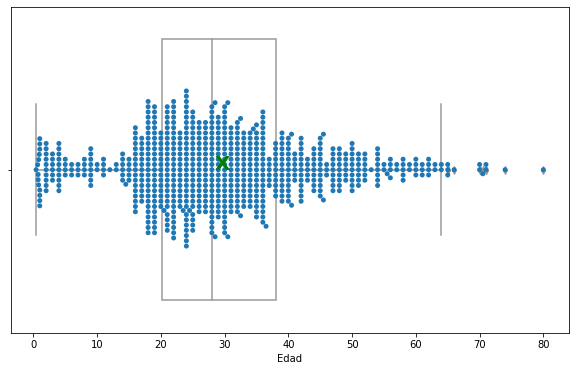

In [129]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax =sns.swarmplot(x="Edad", data=datos) #agregamos otro tipo de puntos swarmplot
ax.text(datos.Edad.mean(),0, "X", 
        weight="bold",size=20,ha='center', color="g")
plt.show(ax)

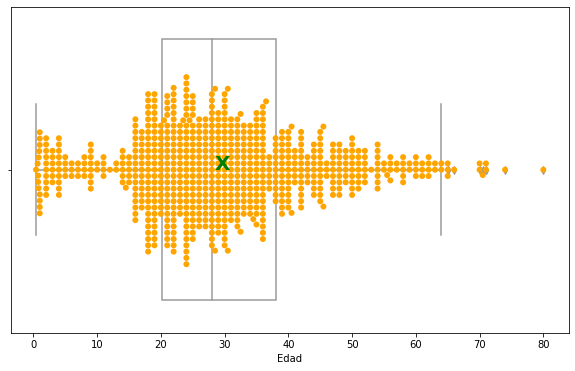

In [131]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax =sns.swarmplot(x="Edad", data=datos,
                  color="orange", size=6) #agregamos características a los puntos
ax.text(datos.Edad.mean(),0, "X", weight="bold",size=20,ha='center', color="g")
plt.show(ax)

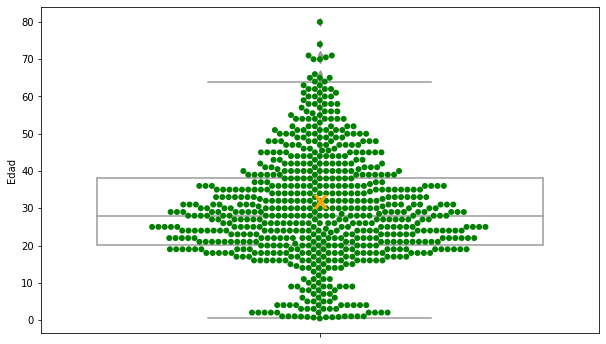

In [141]:
#Gráfico en Y vertical
plt.figure(figsize=(10,6))
ax=sns.boxplot(y="Edad", data=datos, color="white")
ax =sns.swarmplot(y="Edad", data=datos, color="green", size=6)
ax.text(0,datos.Edad.mean(), "X", weight="bold",size=20,ha='center', color="orange")
plt.show(ax)

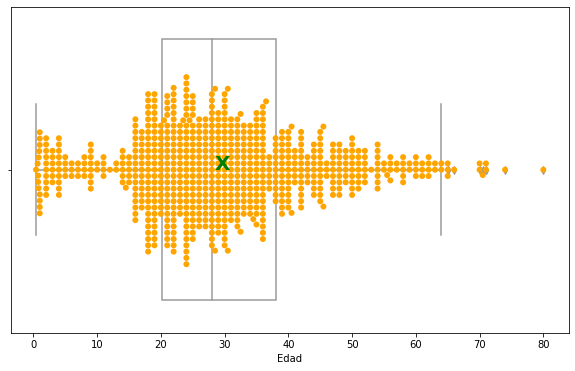

In [162]:
#Final Gráfico
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax =sns.swarmplot(x="Edad", data=datos,color="orange", size=6)
ax.text(datos.Edad.mean(),0, "X", weight="bold",size=20,ha='center', color="g")
plt.show()

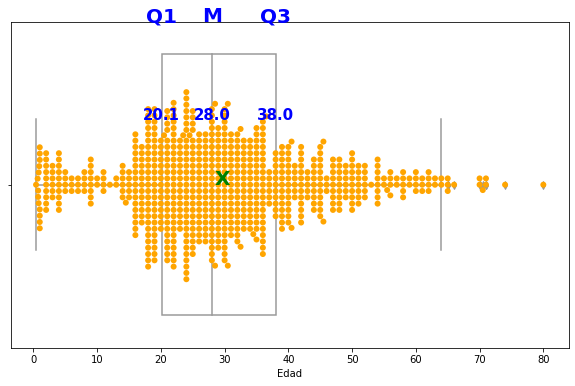

In [163]:
#poner anotaciones
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="Edad", data=datos, color="white")
ax =sns.swarmplot(x="Edad", data=datos,color="orange", size=6)
ax.text(datos.Edad.mean(),0, "X", weight="bold",size=20,ha='center', color="g")

#creamos las variables de los percentiles
p25=datos["Edad"].quantile(0.25)
p50=datos["Edad"].quantile(0.5)
p75=datos["Edad"].quantile(0.75)

#etiquetas cuartiles
ax.text(p25,-0.5, "Q1", weight="bold",size=20,ha='center', color="b")
ax.text(datos.Edad.median(),-0.5, "M", weight="bold",size=20,ha='center', color="b")
ax.text(p75,-0.5, "Q3", weight="bold",size=20,ha='center', color="b")

#valores cuartiles
ax.text(p25,-0.2, p25.round(1), weight="bold",size=15,ha='center', color="b")
ax.text(p50,-0.2, p50.round(1), weight="bold",size=15,ha='center', color="b")
ax.text(p75,-0.2, p75.round(1), weight="bold",size=15,ha='center', color="b")

plt.show(ax)

## 4.- Métodos gráficos de exploración de variables cualitativas

Por favor ver el capítulo de tablas de frecuencia

## 5.- Métodos gráficos de exploración de variables agrupadas

### 5.1 Gráficos de cajas y bigotes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


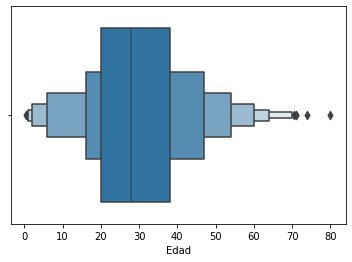

In [244]:
#aislar datos
#graficamos en cajas y bigotes los datos de la edad
sns.boxenplot(datos["Edad"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


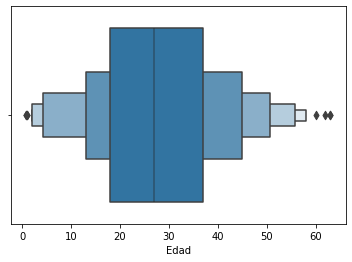

In [245]:
#aislar datos
#graficamos en cajas y bigotes los datos de la edad
#pero solo los del sexo femenino
sns.boxenplot(datos["Edad"][datos.Sexo=="female"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


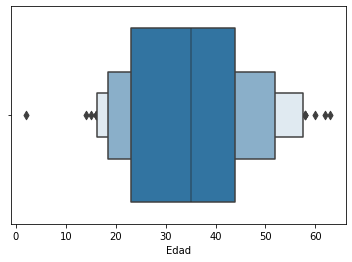

In [246]:
#aislar datos
#graficamos en cajas y bigotes los datos de la edad
#pero solo los del sexo y que sean de la clase 1
sns.boxenplot(datos["Edad"][datos.Sexo=="female"][datos.Clase==1])

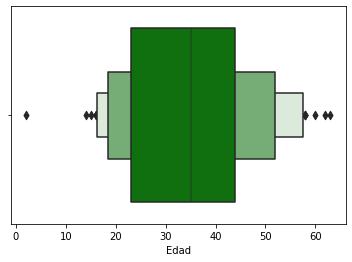

In [250]:
#Arreglamos errores
sns.boxenplot(x=datos["Edad"][datos.Sexo=="female"][datos.Clase==1],color="green") # poner x
plt.show()

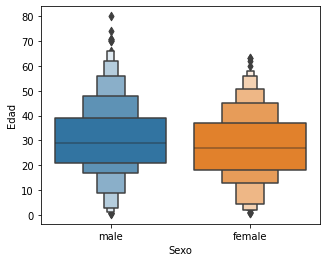

In [176]:
#una variable de agrupamiento en la X
#una variable cuantitativa en la Y

plt.figure(figsize=(5,4))
ax=sns.boxenplot(x="Sexo", y="Edad", data=datos)
plt.show(ax)

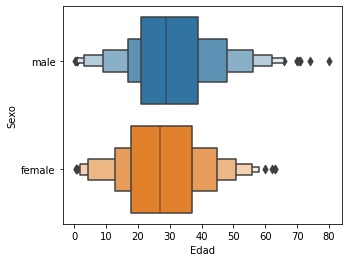

In [177]:
#una variable de agrupamiento en la y
#una variable cuantitativa en la x

plt.figure(figsize=(5,4))
ax=sns.boxenplot(y="Sexo", x="Edad", data=datos)
plt.show(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


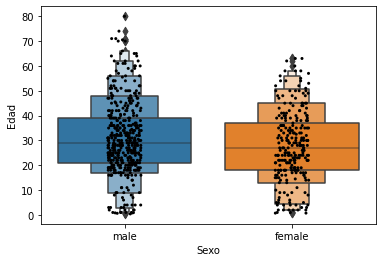

In [ ]:
plt.figure(figsize=(5,4))
ax=sns.boxenplot(x="Sexo", y="Edad", data=datos)
#colocar puntos
ax =sns.stripplot(x="Sexo", y="Edad", data=datos, size=3, jitter=True, color="black")
print(ax)

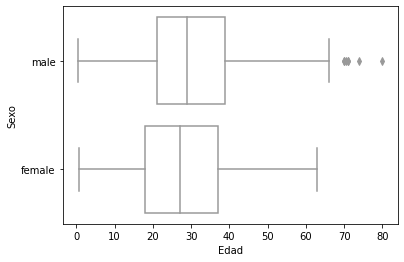

In [178]:
#segundo tipo de boxplot
ax = sns.boxplot(x="Edad" , y="Sexo", data=datos,color="White")

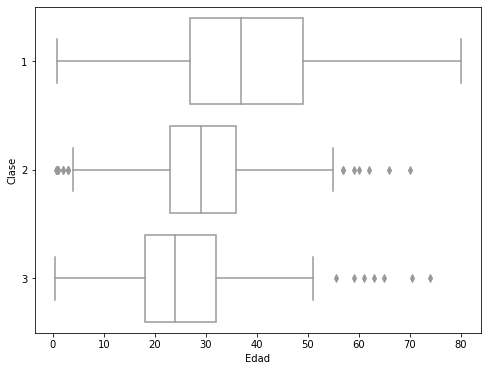

In [182]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Clase", data=datos,color="White")
plt.show()

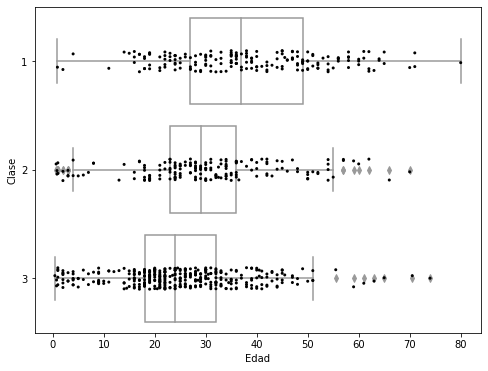

In [184]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Clase", data=datos,color="White")
ax =sns.stripplot(x="Edad", y="Clase", data=datos,
                  size=3, jitter=True, color="black")
plt.show()

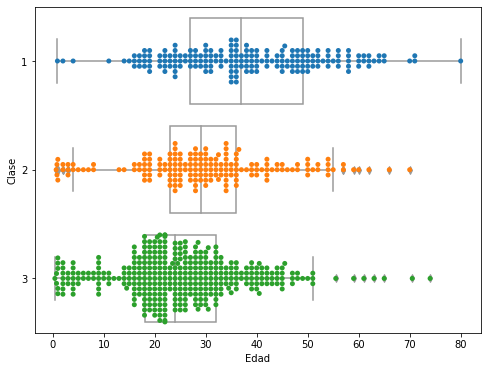

In [196]:
plt.figure(figsize=(8,6)) #tamaño figura x, y
ax = sns.boxplot(x="Edad" , y="Clase", data=datos,color="White")
ax =sns.swarmplot(x="Edad", y="Clase", data=datos) #poner otro tipo de puntos
plt.show(ax)

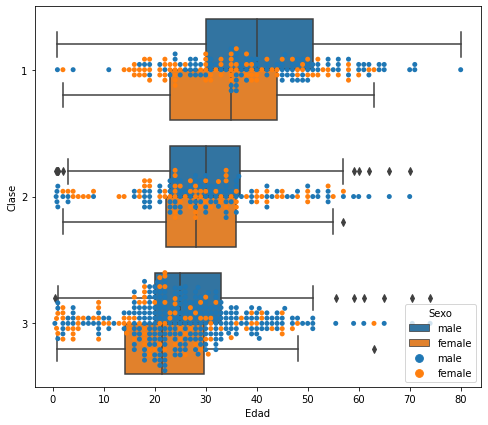

In [195]:
#graficar 3 variables 2 cualitativas y 1 cuantitativa
plt.figure(figsize=(8,7))
ax = sns.boxplot(x="Edad" , y="Clase", data=datos, hue="Sexo")
ax =sns.swarmplot(x="Edad", y="Clase", data=datos,hue="Sexo") #poner otro tipo de puntos
plt.show(ax)

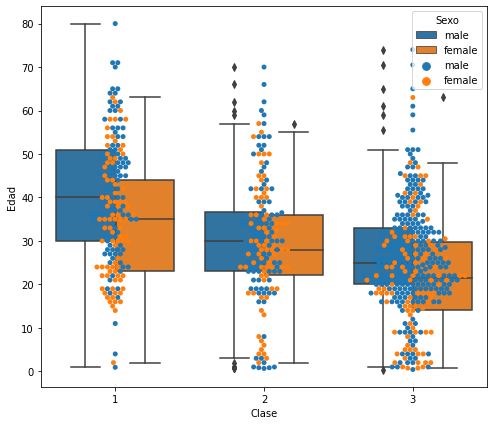

In [197]:
#lo graficamos todo en vertical
plt.figure(figsize=(8,7))
ax = sns.boxplot(y="Edad" , x="Clase", data=datos, hue="Sexo")
ax =sns.swarmplot(y="Edad", x="Clase", data=datos,hue="Sexo")
plt.show(ax)

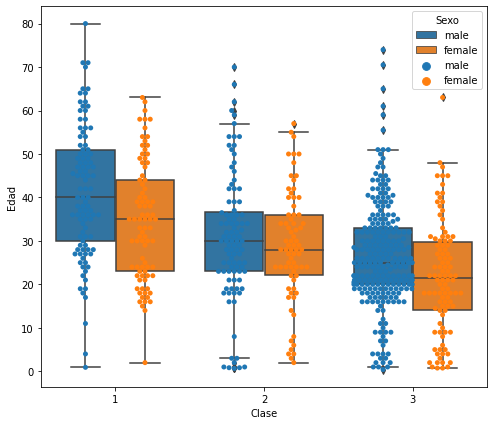

In [198]:
plt.figure(figsize=(8,7))
ax = sns.boxplot(y="Edad" , x="Clase", data=datos, hue="Sexo")
ax =sns.swarmplot(y="Edad", x="Clase", data=datos,hue="Sexo", dodge=True) #hacer un split en los puntos
plt.show(ax)

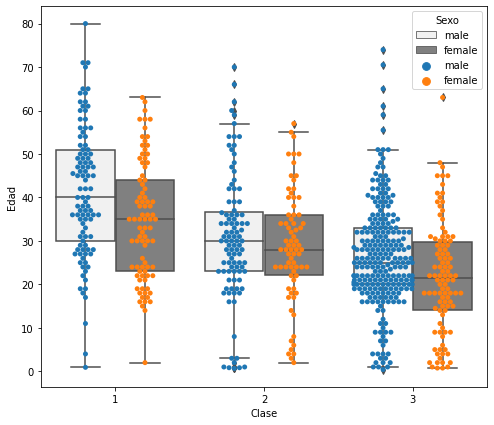

In [214]:
#lo graficamos todo en vertical
plt.figure(figsize=(8,7))
ax = sns.boxplot(y="Edad" , x="Clase", data=datos, hue="Sexo",color="gray") #ponemos un color gris
ax =sns.swarmplot(y="Edad", x="Clase", data=datos,hue="Sexo", dodge=True) 
plt.show(ax)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


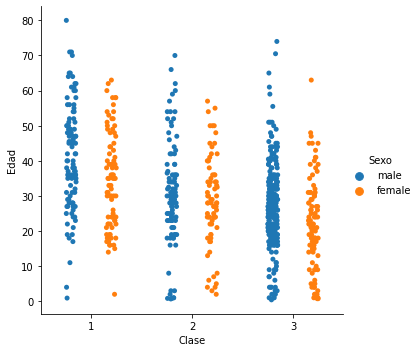

In [336]:
#Gráfico de catplot sencillo
sns.catplot(x="Clase", y="Edad", hue="Sexo",split=True,
                    data=datos)

<Figure size 576x720 with 0 Axes>

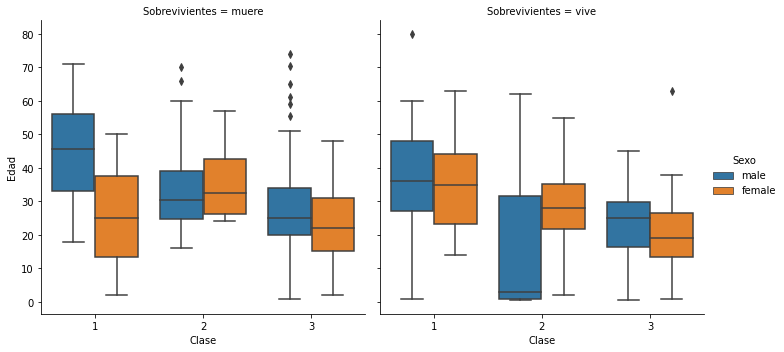

In [232]:
##graficar 4 variables 3 cualitativas y 1 cuantitativa

#biblio https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
#biblio https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot

plt.figure(figsize=(8,10))
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="box",
                );       
plt.show(ax)



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x720 with 0 Axes>

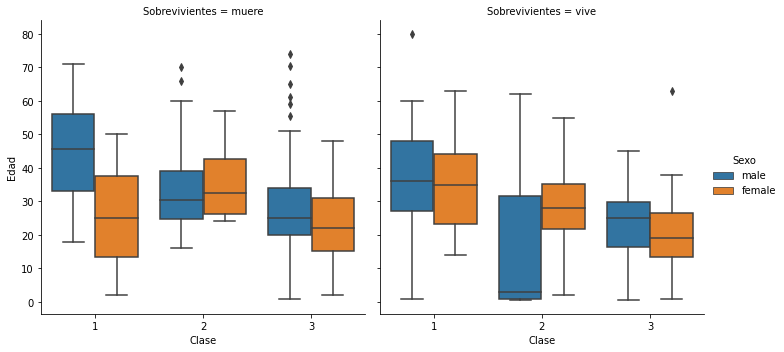

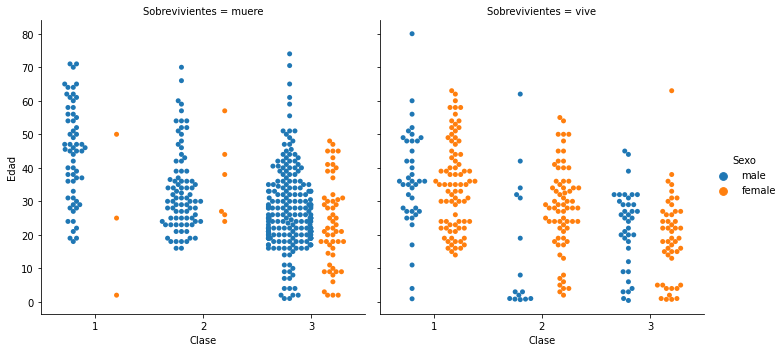

In [233]:
plt.figure(figsize=(8,10))
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="box",
                );

 #agregamos gráfico de puntos              
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="swarm",dodge=True
                );
                  
plt.show(ax)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 576x1080 with 0 Axes>

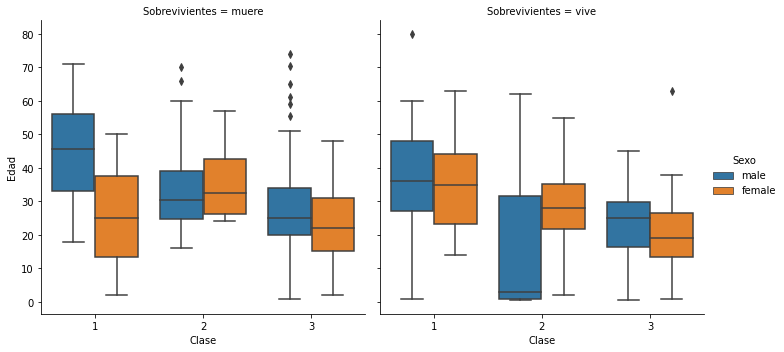

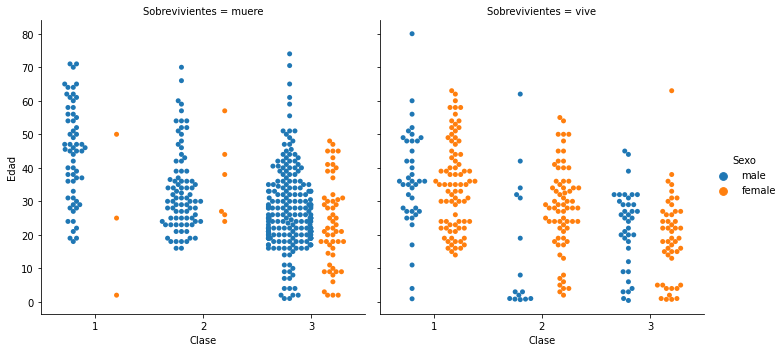

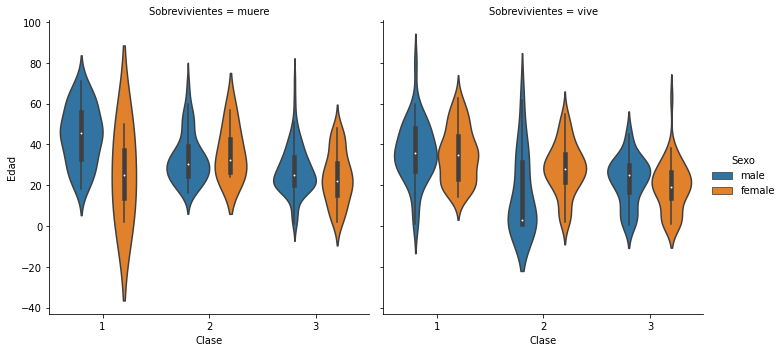

In [235]:
plt.figure(figsize=(8,15))
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="box",
                );
                
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="swarm",dodge=True
                );

#agregamos graficos de violines
ax = sns.catplot(y="Edad", x="Clase",
                hue="Sexo", col="Sobrevivientes",
                data=datos, kind="violin",dodge=True
                );
                  
plt.show(ax)


### 5.2 Histogramas

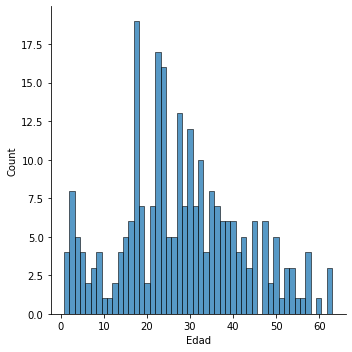

In [ ]:
#hacemos una gráfical de histograma de una variable aislada
#edad pero solo los del sexo femenio
sns.displot(datos["Edad"][datos.Sexo=="female"], bins=50)

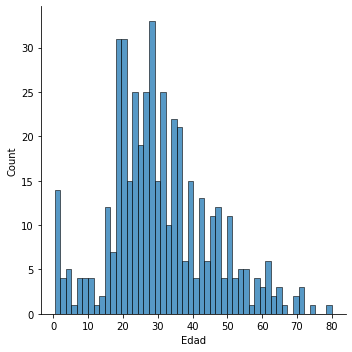

In [ ]:
#ahora los del sexo masculino
sns.displot(datos["Edad"][datos.Sexo=="male"], bins=50)

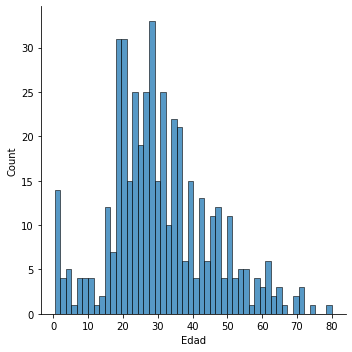

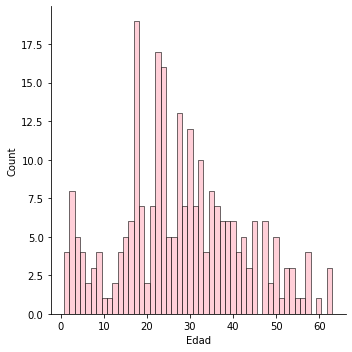

In [254]:
#las dos juntas
ax=sns.displot(datos["Edad"][datos.Sexo=="male"], bins=50)
ax=sns.displot(datos["Edad"][datos.Sexo=="female"], bins=50, color="pink")

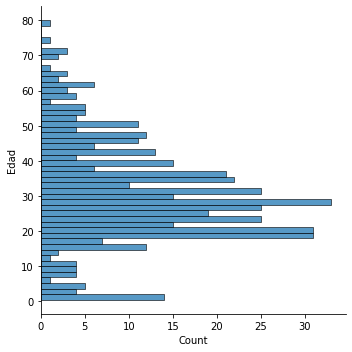

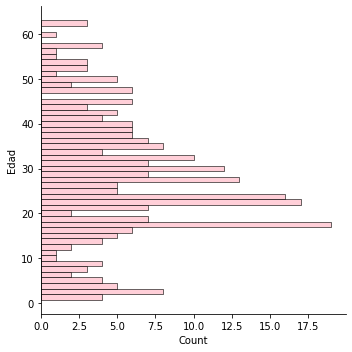

In [291]:
#las dos juntas pero en el eje y
ax=sns.displot(y=datos["Edad"][datos.Sexo=="male"], bins=50)
ax=sns.displot(y=datos["Edad"][datos.Sexo=="female"], bins=50, color="pink")

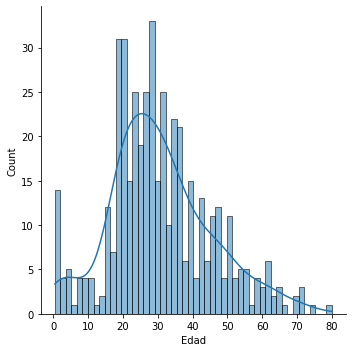

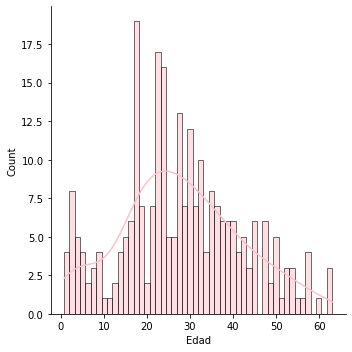

In [330]:
#reacomodamos las gráficas en x y agregamos linea de tendencia
ax=sns.displot(x=datos["Edad"][datos.Sexo=="male"], bins=50, kde=True,)
ax=sns.displot(x=datos["Edad"][datos.Sexo=="female"], bins=50, color="pink", kde=True,)


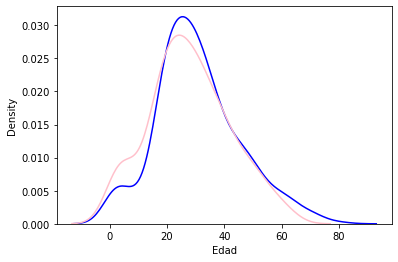

In [332]:
#vemos como se comparan las líneas de tendencia con kdeplot
sns.kdeplot(datos["Edad"][datos.Sexo=="male"],color="blue")
sns.kdeplot(datos["Edad"][datos.Sexo=="female"],color="pink")

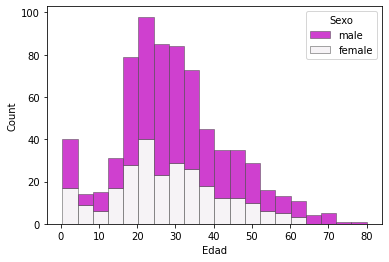

In [347]:
#histogramos  con histplot
sns.histplot(
    datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
)

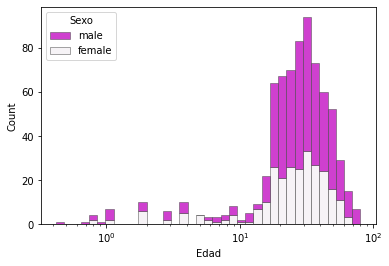

In [351]:
sns.histplot(
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,#histogramos  con histplot en escala logaritmica
)

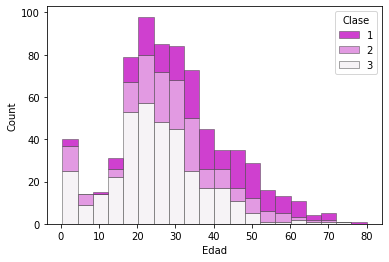

In [349]:
#edad por clase
sns.histplot(
    datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

Text(0.5, 1.0, 'histograma de edad por clase')

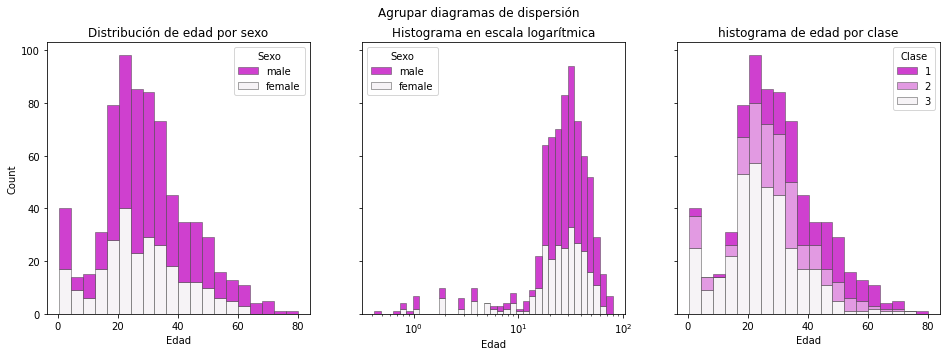

In [372]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
fig.suptitle('Agrupar diagramas de dispersión')

# primero
sns.histplot(
    ax=axes[0],
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
 
)


axes[0].set_title("Distribución de edad por sexo")

#segundo
sns.histplot(
    ax=axes[1],
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,#histogramos  con histplot en escala logaritmica
)

axes[1].set_title("Histograma en escala logarítmica")

# Tercero
sns.histplot(
    ax=axes[2],
    data=datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
 
)


axes[2].set_title("histograma de edad por clase")

Text(0.5, 1.0, 'Histograma de edad por clase')

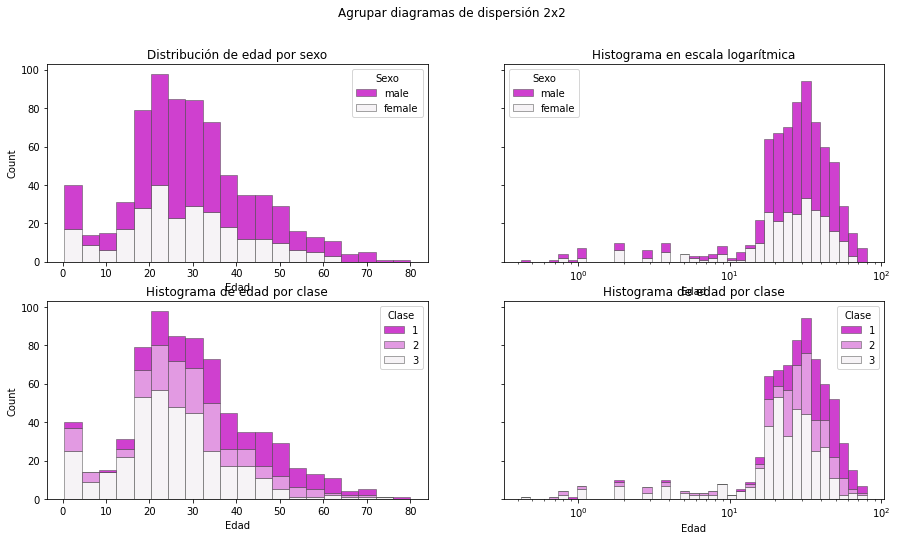

In [374]:
#mismo gráfico pero ahora 2 X 2 
fig, axes = plt.subplots(2, 2, figsize=(15, 8), sharey=True) #filas, columnas
fig.suptitle('Agrupar diagramas de dispersión 2x2')

# primero
sns.histplot(
    ax=axes[0,0],
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
 
)


axes[0,0].set_title("Distribución de edad por sexo")

#segundo
sns.histplot(
    ax=axes[0,1],
    data=datos,
    x="Edad", hue="Sexo",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,#histogramos  con histplot en escala logaritmica
)

axes[0,1].set_title("Histograma en escala logarítmica")

# Tercero
sns.histplot(
    ax=axes[1,0],
    data=datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
 
)


axes[1,0].set_title("Histograma de edad por clase")

# Cuarto
sns.histplot(
    ax=axes[1,1],
    data=datos,
    x="Edad", hue="Clase",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,#histogramos  con histplot en escala logaritmica
 
)


axes[1,1].set_title("Histograma de edad por clase")

### 5.3 Gráfico de violin

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


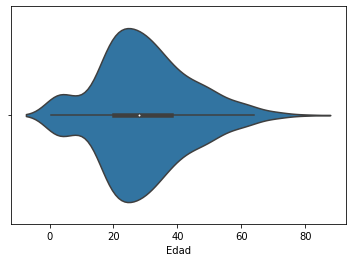

In [ ]:
sns.violinplot(datos["Edad"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


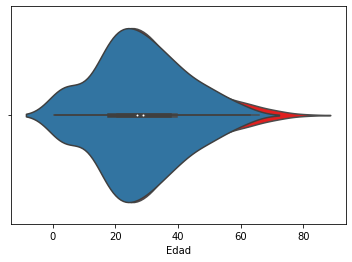

In [ ]:
sns.violinplot(datos["Edad"][datos.Sexo=="male"],color="red")
sns.violinplot(datos["Edad"][datos.Sexo=="female"])

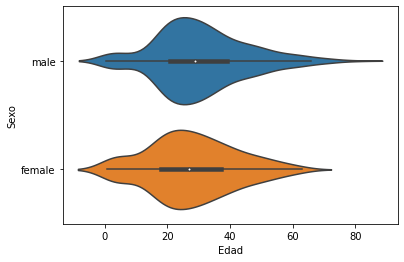

In [ ]:
sns.violinplot(x="Edad", y="Sexo", data=datos)

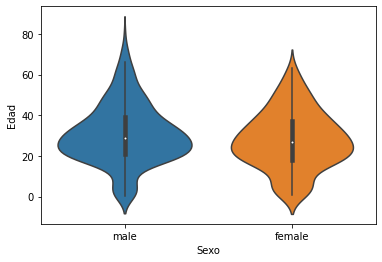

In [ ]:
sns.violinplot(x="Sexo", y="Edad", data=datos)

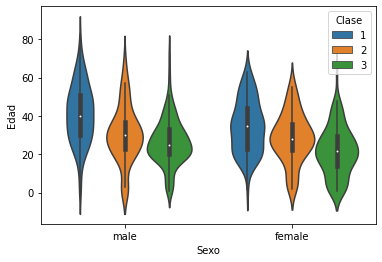

In [ ]:
sns.violinplot(x="Sexo", y="Edad",hue="Clase", data=datos)

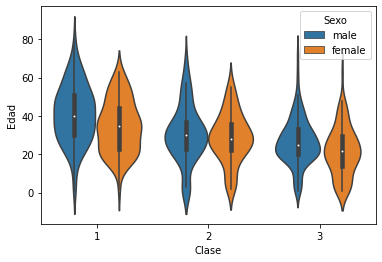

In [377]:
sns.violinplot(x="Clase", y="Edad",hue="Sexo", data=datos)

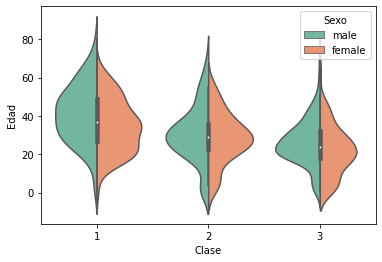

In [ ]:
ax = sns.violinplot(x="Clase", y="Edad", hue="Sexo",
                    data=datos, palette="Set2", split=True,
                   )

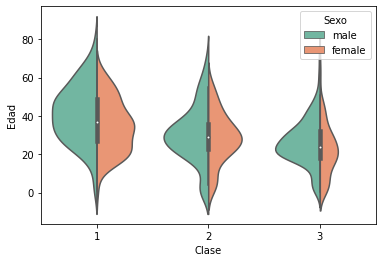

In [ ]:
ax = sns.violinplot(x="Clase", y="Edad", hue="Sexo",
                    data=datos, palette="Set2", split=True,
                    scale="count")

### Gráficos Agrupados

Text(0.5, 1.0, 'squirtle.name')

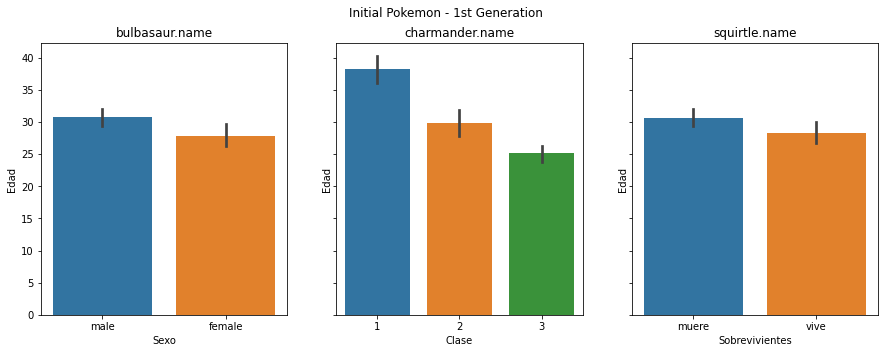

In [297]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
sns.barplot(ax=axes[0], x=datos.Sexo, y=datos.Edad)
axes[0].set_title("bulbasaur.name")

# Charmander
sns.barplot(ax=axes[1], x=datos.Clase, y=datos.Edad)
axes[1].set_title("charmander.name")

# Squirtle
sns.barplot(ax=axes[2], x=datos.Sobrevivientes, y=datos.Edad)
axes[2].set_title("squirtle.name")

Text(0.5, 1.0, 'squirtle.name')

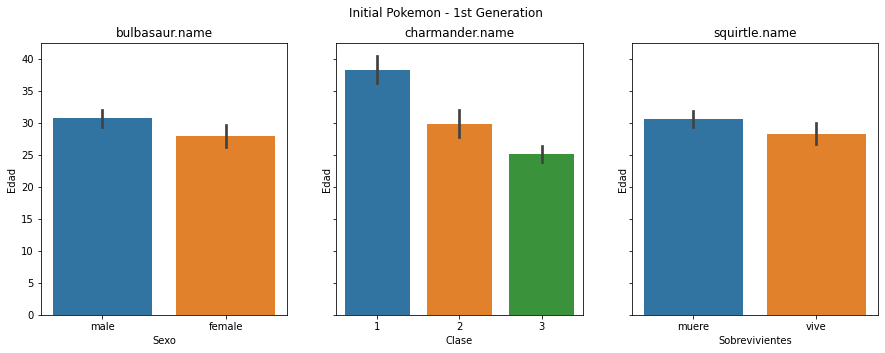

In [307]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
sns.barplot(ax=axes[0], x=datos.Sexo, y=datos.Edad)
axes[0].set_title("bulbasaur.name")

# Charmander
sns.barplot(ax=axes[1], x=datos.Clase, y=datos.Edad)
axes[1].set_title("charmander.name")

# Squirtle
sns.barplot(ax=axes[2], x=datos.Sobrevivientes, y=datos.Edad)
axes[2].set_title("squirtle.name")

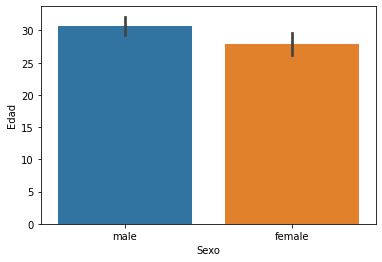

In [ ]:
sns.barplot(x="Sexo",y="Edad",data=datos)

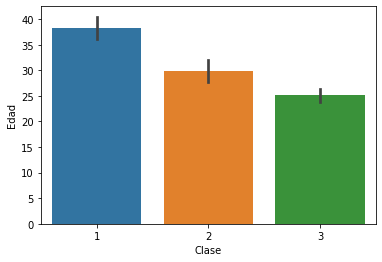

In [ ]:
sns.barplot(x="Clase",y="Edad",data=datos)

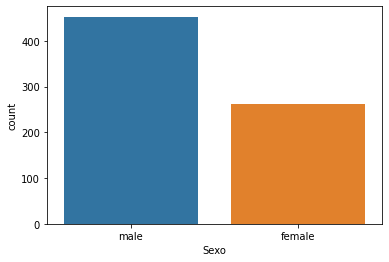

In [ ]:
sns.countplot(x="Sexo",data=datos)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


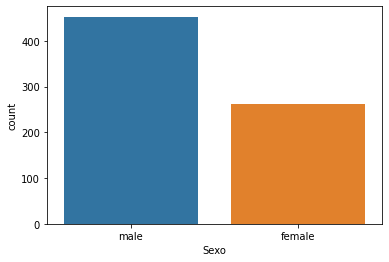

In [ ]:
sns.countplot(datos["Sexo"])

## Estadísticos descriptivos por grupo

In [164]:
#vamos a trabajar con un nuevo dataframe
titanic=sns.load_dataset("titanic")
titanic.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [168]:
#estadísticos por grupo
agrupados_datos =titanic.groupby('sex')
agrupados_datos.describe().round(1).transpose()

sex             female   male
survived count   314.0  577.0
         mean      0.7    0.2
         std       0.4    0.4
         min       0.0    0.0
         25%       0.0    0.0
         50%       1.0    0.0
         75%       1.0    0.0
         max       1.0    1.0
pclass   count   314.0  577.0
         mean      2.2    2.4
         std       0.9    0.8
         min       1.0    1.0
         25%       1.0    2.0
         50%       2.0    3.0
         75%       3.0    3.0
         max       3.0    3.0
age      count   261.0  453.0
         mean     27.9   30.7
         std      14.1   14.7
         min       0.8    0.4
         25%      18.0   21.0
         50%      27.0   29.0
         75%      37.0   39.0
         max      63.0   80.0
sibsp    count   314.0  577.0
         mean      0.7    0.4
         std       1.2    1.1
         min       0.0    0.0
         25%       0.0    0.0
         50%       0.0    0.0
         75%       1.0    0.0
         max       8.0    8.0
parch    count   314.0  577.0
         mean      0.6    0.2
         std       1.0    0.6
         min       0.0    0.0
         25%       0.0    0.0
         50%       0.0    0.0
         75%       1.0    0.0
         max       6.0    5.0
fare     count   314.0  577.0
         mean     44.5   25.5
         std      58.0   43.1
         min       6.8    0.0
         25%      12.1    7.9
         50%      23.0   10.5
         75%      55.0   26.6
         max     512.3  512.3

In [ ]:
agrupados_datos = datos[['Edad']]
agrupados_datos = datos.groupby('Sexo')
agrupados_datos.describe().round(1).transpose()

In [170]:
#define la función para calcular cv 
cv = lambda x: np. std (x, ddof = 1 ) / np. mean (x) * 100 

In [171]:
 #calcular CV
 cv (titanic)

survived      126.770139
pclass         36.214851
age            48.912219
sibsp         210.846437
parch         211.234407
fare          154.307253
adult_male     81.237834
alone          81.237834
dtype: float64

In [172]:
titanic.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

## Otro graficos

In [328]:
datos["Sexo"].value_counts()

male      453
female    261
Name: Sexo, dtype: int64

In [329]:
datos["Clase"].value_counts()

3    355
1    186
2    173
Name: Clase, dtype: int64

## estadísticas por grupo

In [ ]:
datos.groupby("Clase")["Edad"].mean()
#direfentes medias
#https://docs.python.org/es/3.8/library/statistics.html

Clase
1    38.233441
2    29.877630
3    25.140620
Name: Edad, dtype: float64

In [ ]:
datos.groupby("Clase")["Edad"].median()

Clase
1    37.0
2    29.0
3    24.0
Name: Edad, dtype: float64

## Estadísticos circulares

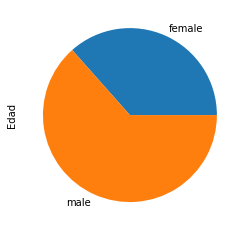

In [72]:
datos.Edad.groupby(datos["Sexo"]).count().plot(kind='pie')

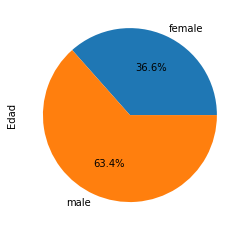

In [73]:
datos.Edad.groupby(datos["Sexo"]).count().plot(kind='pie',autopct='%1.1f%%')

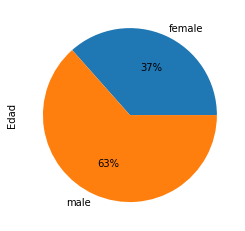

In [74]:
datos.Edad.groupby(datos["Sexo"]).count().plot(kind='pie',autopct='%1.0f%%')

## Gráficos Agrupados

In [ ]:
#importamos el data frame
url="https://raw.githubusercontent.com/armandovl/datasets_uno/main/atitanic.csv"
datos= pd.read_csv(url)
datos.head()

,PassengerId,Name,Age,Pclass,Sex,Family,Embarked,Survived
0,891,"Dooley, Mr. Patrick",32.0,3,male,0,Q,muere
1,890,"Behr, Mr. Karl Howell",26.0,1,male,0,C,vive
2,888,"Graham, Miss. Margaret Edith",19.0,1,female,0,S,vive
3,887,"Montvila, Rev. Juozas",27.0,2,male,0,S,muere
4,886,"Rice, Mrs. William (Margaret Norton)",39.0,3,female,5,Q,muere


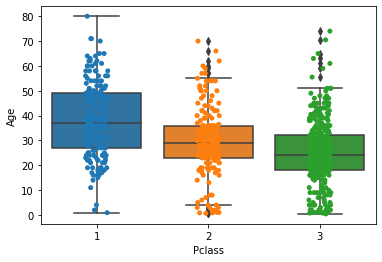

In [ ]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos)
ax = sns.stripplot(x="Pclass", y="Age", data=datos, jitter=True, edgecolor="gray")

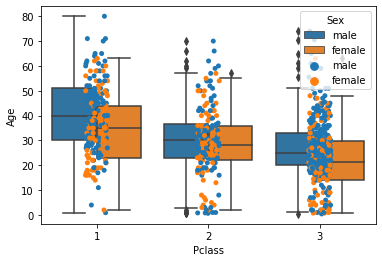

In [ ]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex")
ax = sns.stripplot(x="Pclass", y="Age", data=datos, jitter=True, edgecolor="gray" ,hue="Sex")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


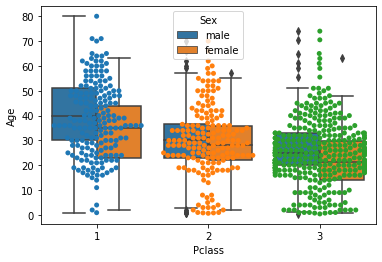

In [ ]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex")
ax = sns.swarmplot(x="Pclass", y="Age", data=datos, edgecolor="gray")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


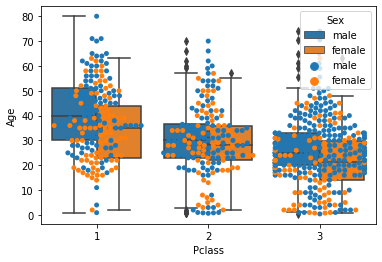

In [ ]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex")
ax = sns.swarmplot(x="Pclass", y="Age", data=datos, edgecolor="gray",hue="Sex" )

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


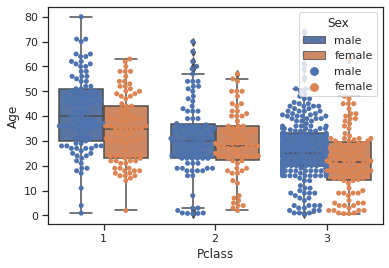

In [ ]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex");
ax = sns.swarmplot(x="Pclass", y="Age", data=datos, edgecolor="gray",hue="Sex" ,split=True);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


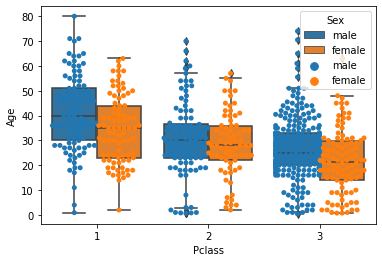

In [ ]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex");
ax = sns.swarmplot(x="Pclass", y="Age", data=datos, edgecolor="gray",hue="Sex" ,dodge=True);

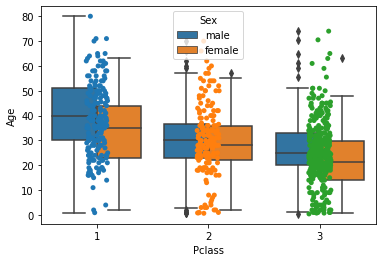

In [ ]:
ax = sns.boxplot(x="Pclass", y="Age", data=datos ,hue="Sex")
ax = sns.stripplot(x="Pclass", y="Age", data=datos, jitter=True, edgecolor="gray")

## Gráficos para  numéricos

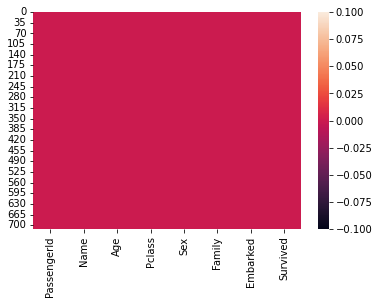

In [ ]:
#ver los valores nulos en un gráfico
sns.heatmap(datos.isnull())
#la edad y cabin hay varios nulos

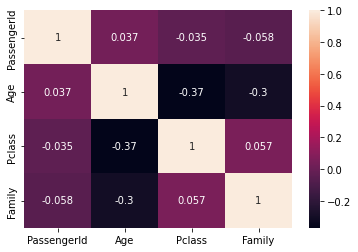

In [ ]:
sns.heatmap(datos.corr(), annot=True) #mapa de correlaciones

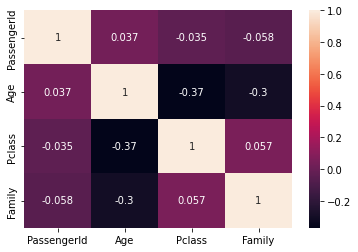

In [ ]:
corr = datos.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values,
      annot=True) 

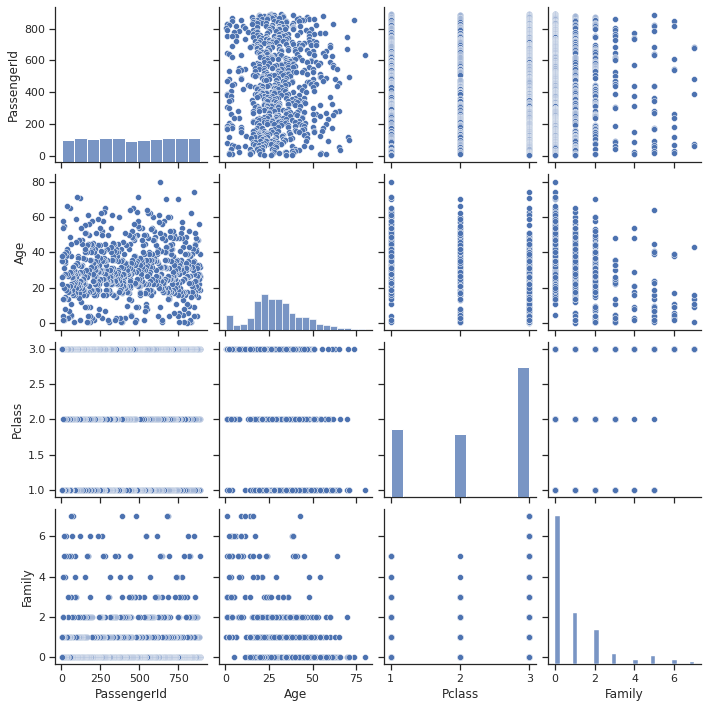

In [ ]:
sns.set(style="ticks",font_scale=1)
sns.pairplot(datos)